In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import zipfile
import os

# Files upload
uploaded = files.upload()  # upload human+activity+recognition+using+smartphones.zip

# Uncompressed
zip_path = "human+activity+recognition+using+smartphones.zip"
extract_dir = "human_activity_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check internal files
os.listdir(extract_dir)


Saving human+activity+recognition+using+smartphones.zip to human+activity+recognition+using+smartphones.zip


['UCI HAR Dataset.zip', 'UCI HAR Dataset.names']

In [ ]:
# Re-check and release internal compressed files      
inner_zip = os.path.join(extract_dir, "UCI HAR Dataset.zip")
inner_extract_dir = "UCI_HAR_Dataset"

with zipfile.ZipFile(inner_zip, 'r') as zip_ref:
    zip_ref.extractall(inner_extract_dir)

# Check Dataset Path
os.listdir(os.path.join(inner_extract_dir, "UCI HAR Dataset"))


['.DS_Store',
 'features.txt',
 'test',
 'features_info.txt',
 'train',
 'activity_labels.txt',
 'README.txt']

#1. Activity Classification


## 1-1. Feature Reduction

In [1]:
import pandas as pd
import os

# Set the base path
base_path = os.path.join(inner_extract_dir, "UCI HAR Dataset")

# Load feature names
feature_names = pd.read_csv(os.path.join(base_path, "features.txt"),
                            delim_whitespace=True, header=None, names=['index', 'feature'])['feature'].values

# Define function to load a data split
def load_data_split(split="train"):
    X = pd.read_csv(os.path.join(base_path, split, f"X_{split}.txt"),
                    delim_whitespace=True, header=None)
    y = pd.read_csv(os.path.join(base_path, split, f"y_{split}.txt"),
                    delim_whitespace=True, header=None, names=["activity"])
    subjects = pd.read_csv(os.path.join(base_path, split, f"subject_{split}.txt"),
                           delim_whitespace=True, header=None, names=["subject"])

    X.columns = feature_names  # Assign column names
    df = pd.concat([subjects, y, X], axis=1)
    return df

# Load and merge train and test datasets
train_df = load_data_split("train")
test_df = load_data_split("test")
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

print(f"Total number of samples: {full_df.shape[0]}")
print(f"Total number of columns: {full_df.shape[1]}")


NameError: name 'inner_extract_dir' is not defined

In [ ]:
selected_features = [
    "tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z",
    "tBodyAcc-std()-X", "tBodyAcc-std()-Y", "tBodyAcc-std()-Z",
    "tBodyGyro-mean()-X", "tBodyGyro-mean()-Y", "tBodyGyro-mean()-Z",
    "tGravityAcc-mean()-X", "tGravityAcc-mean()-Y", "tGravityAcc-mean()-Z",
    "tGravityAcc-std()-X", "tGravityAcc-std()-Y", "tGravityAcc-std()-Z",
    "tBodyGyro-entropy()-X", "tBodyGyro-entropy()-Y", "tBodyGyro-entropy()-Z",
    "tBodyAccMag-mean()", "tBodyAccMag-std()",
    "tBodyGyroMag-mean()", "tBodyGyroMag-std()",
    "tBodyAcc-sma()",
    "tBodyAcc-energy()-X", "tBodyAcc-energy()-Y", "tBodyAcc-energy()-Z",
    "tBodyAcc-entropy()-X", "tBodyAcc-entropy()-Y", "tBodyAcc-entropy()-Z",
]

# Extract only the selected features
df_selected = full_df[["subject", "activity"] + selected_features]
df_selected.head()


,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyGyro-mean()-X,tBodyGyro-mean()-Y,...,tBodyAccMag-std(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.006101,-0.031365,...,-0.950551,-0.968959,-0.964335,-0.965523,-0.999945,-0.999863,-0.994612,-0.407747,-0.679338,-0.602122
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.016112,-0.083894,...,-0.976057,-0.980683,-0.983754,-0.981930,-0.999991,-0.999788,-0.998405,-0.714892,-0.500930,-0.570979
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.031698,-0.102335,...,-0.988020,-0.976317,-0.986051,-0.983478,-0.999969,-0.999660,-0.999470,-0.592235,-0.485821,-0.570979
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.043410,-0.091386,...,-0.986421,-0.982060,-0.987351,-0.986093,-0.999976,-0.999736,-0.999504,-0.627446,-0.850930,-0.911872
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.033960,-0.074708,...,-0.991275,-0.985204,-0.989063,-0.992653,-0.999991,-0.999856,-0.999757,-0.786553,-0.559477,-0.761434


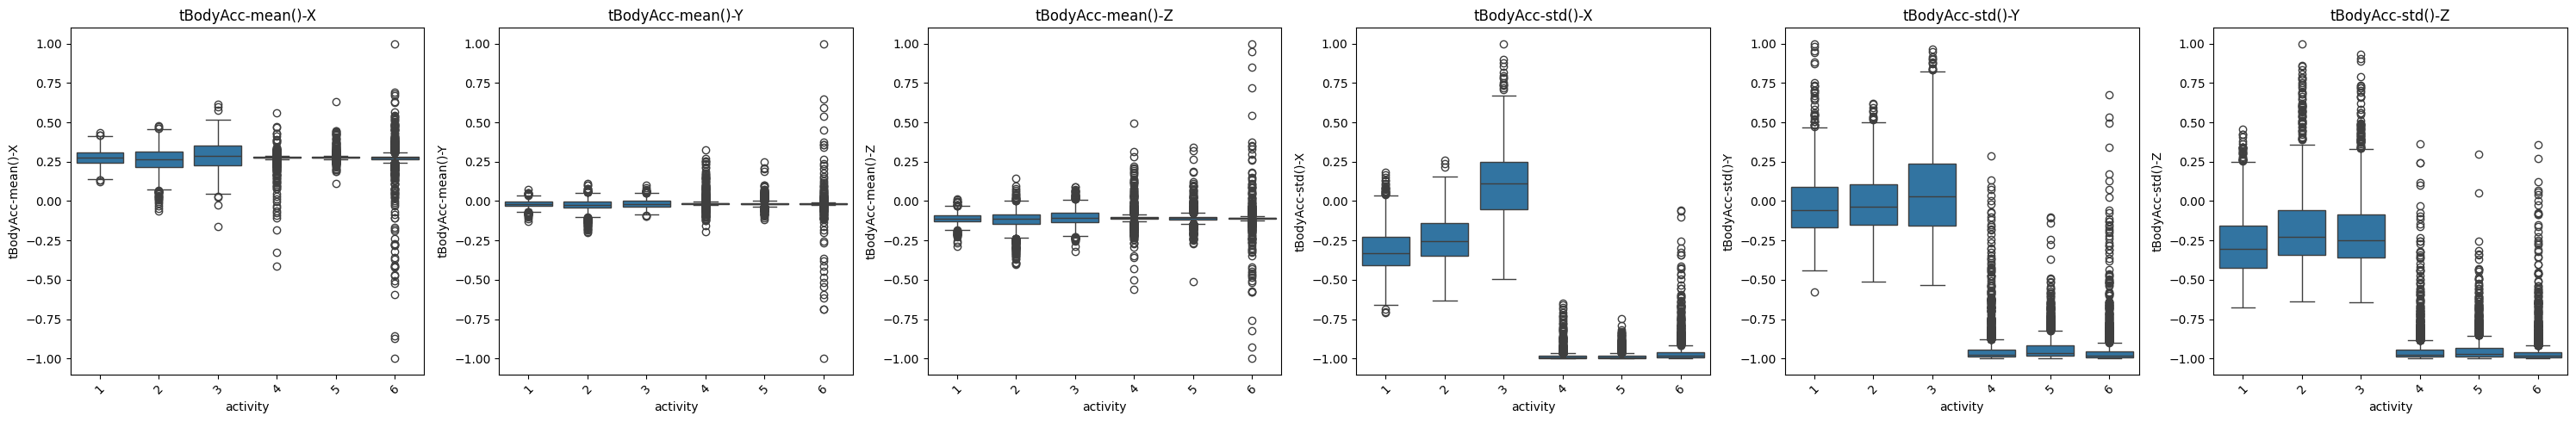

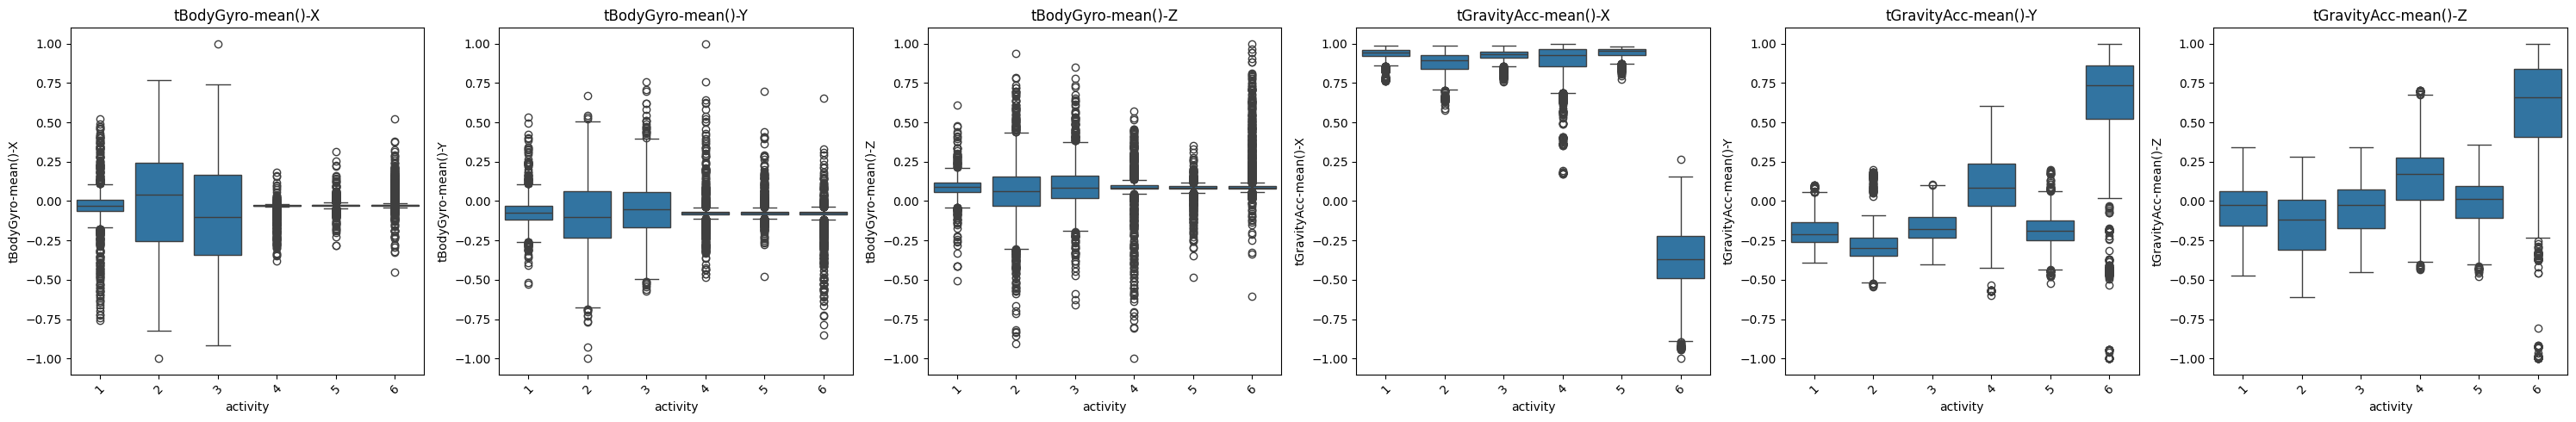

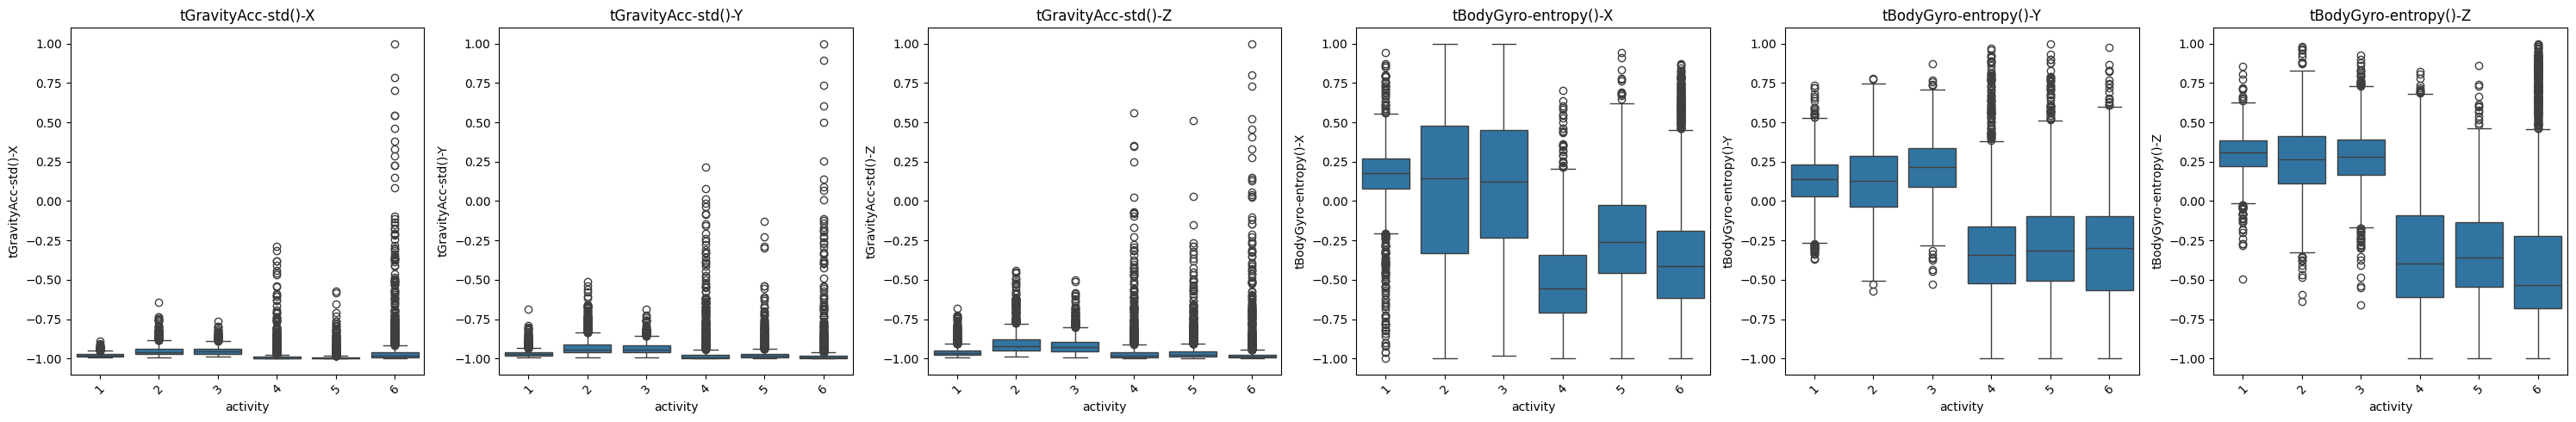

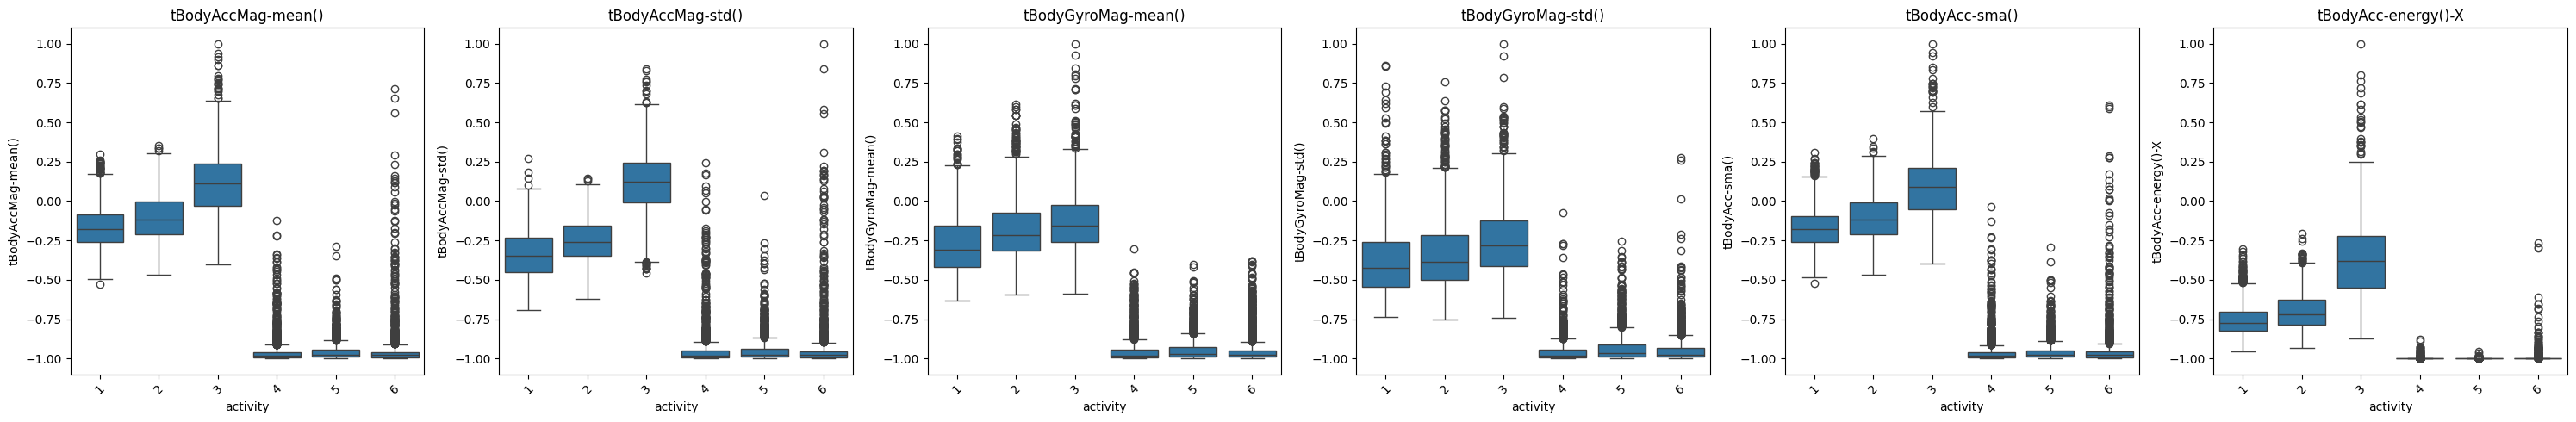

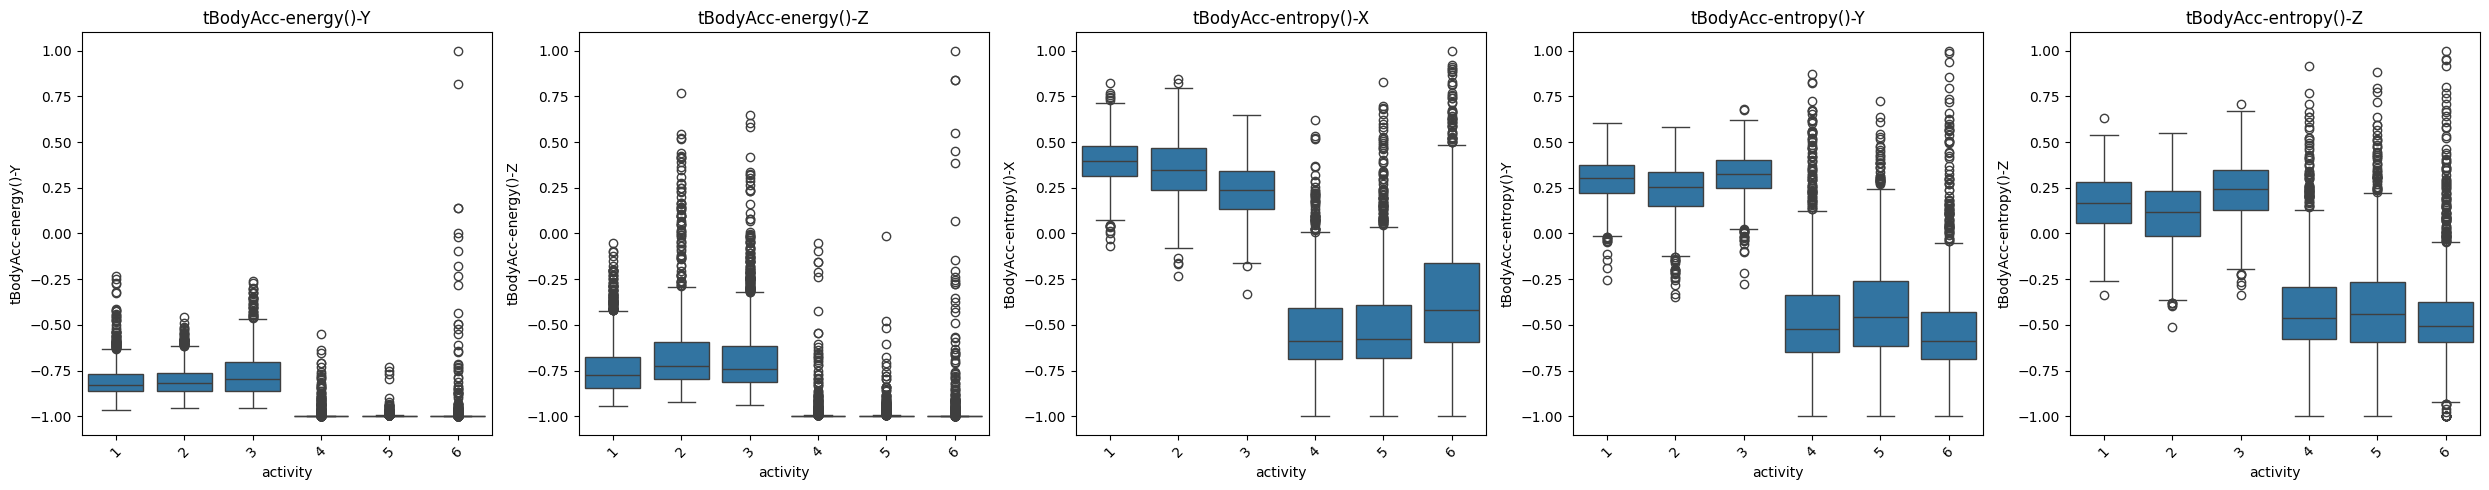

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions_by_activity(df_selected, selected_features, activity_column="activity", max_features_per_fig=6):
    """
    Plot boxplots of each selected feature by activity.

    Parameters:
        df_selected (pd.DataFrame): DataFrame containing activity and selected features
        selected_features (List[str]): List of feature column names to plot
        activity_column (str): Column name containing activity labels
        max_features_per_fig (int): Number of features per figure (for readability)
    """
    total_features = len(selected_features)
    for i in range(0, total_features, max_features_per_fig):
        feature_subset = selected_features[i:i+max_features_per_fig]
        num_cols = len(feature_subset)

        plt.figure(figsize=(5 * num_cols, 5))
        for j, feature in enumerate(feature_subset, 1):
            plt.subplot(1, num_cols, j)
            sns.boxplot(data=df_selected, x=activity_column, y=feature)
            plt.xticks(rotation=45)
            plt.title(feature)
        plt.tight_layout()
        plt.show()

# Run the plot function on df_selected and selected_features
plot_feature_distributions_by_activity(df_selected, selected_features)


##1-2. Data Preprocessing
- Data Cleaning
- Data Scaling (StandardScaler)
- Label Encoding

In [ ]:
import numpy as np
import random

# Function to inject dirty data
def inject_dirty_data(df, dup_ratio=0.01, missing_ratio=0.01):
    df_dirty = df.copy()

    #  1. Insert duplicate rows
    n_dup = int(len(df_dirty) * dup_ratio)
    duplicates = df_dirty.sample(n_dup, random_state=42)
    df_dirty = pd.concat([df_dirty, duplicates], ignore_index=True)

    #  2. Insert missing values (randomly in selected feature columns)
    n_missing = int(df_dirty.size * missing_ratio)
    for _ in range(n_missing):
        row_idx = random.randint(0, df_dirty.shape[0] - 1)
        col_idx = random.randint(2, df_dirty.shape[1] - 1)  # Skip 'subject' and 'activity' columns
        df_dirty.iat[row_idx, col_idx] = np.nan

    print(f"[DIRTY] Number of duplicate rows inserted: {n_dup}")
    print(f"[DIRTY] Number of missing value cells inserted: {n_missing}")
    return df_dirty

# Generate dirty dataset
df_dirty = inject_dirty_data(df_selected)

print(f"[DIRTY] Total number of samples generated: {df_dirty.shape[0]}")
print(f"[DIRTY] Number of samples with missing values: {df_dirty.isnull().any(axis=1).sum()}")
print(f"[DIRTY] Are there any duplicates?: {df_dirty.duplicated().any()}")


[DIRTY] Number of duplicate rows inserted: 102
[DIRTY] Number of missing value cells inserted: 3224
[DIRTY] Total number of samples generated: 10401
[DIRTY] Number of samples with missing values: 2781
[DIRTY] Are there any duplicates?: True


##1-3. Data Scaling (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Before scaling: retain source
df_model = df_cleaned.copy()

# Scaling target features
X = df_model[selected_features]

# Applying Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scaling and converting to data frames
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Combine with existing subject, activity
df_scaled = pd.concat([df_model[["subject", "activity"]].reset_index(drop=True), X_scaled_df], axis=1)

print(f"[SCALE] 스케일링 완료. shape: {df_scaled.shape}")
df_scaled.head()


[SCALE] 스케일링 완료. shape: (7591, 31)


,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyGyro-mean()-X,tBodyGyro-mean()-Y,...,tBodyAccMag-std(),tBodyGyroMag-mean(),tBodyGyroMag-std(),tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z
0,1,5,0.060346,0.028827,-0.300284,-0.888270,-0.928073,-0.860476,0.075176,-0.059133,...,-0.895693,-0.938483,-0.920080,-0.930016,-0.704571,-0.765906,-0.705892,-1.329338,-0.857418,-1.125858
1,1,5,0.071375,-0.235946,-0.295553,-0.883368,-0.944266,-0.935986,-0.071323,-0.114343,...,-0.919827,-0.941932,-0.930407,-0.939041,-0.704508,-0.765492,-0.711342,-1.140146,-1.663150,-2.051042
2,1,5,0.034200,0.024524,-0.137845,-0.888027,-0.939099,-0.935504,-0.020611,0.008556,...,-0.931130,-0.949806,-0.935321,-0.953260,-0.704568,-0.766439,-0.712597,-1.484380,-0.992198,-1.642753
3,1,5,0.042525,0.199554,0.065734,-0.886198,-0.958425,-0.947790,0.007214,0.040352,...,-0.940382,-0.951536,-0.927792,-0.956023,-0.704548,-0.766448,-0.713394,-1.409340,-0.751159,-1.071313
4,1,5,0.075463,-0.058534,-0.031528,-0.885256,-0.911855,-0.917185,0.008155,-0.052891,...,-0.911268,-0.950550,-0.922581,-0.940652,-0.704533,-0.764878,-0.711988,-1.161216,-0.889236,-1.032425


##1-4. Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy
df_labeled = df_scaled.copy()

# Perform label encoding
le = LabelEncoder()
df_labeled['activity_label'] = le.fit_transform(df_labeled['activity'])

# Class mapping output
activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("[LABEL] 클래스 매핑:", activity_mapping)

# Isolation of data for final learning
X_final = df_labeled[selected_features]
y_final = df_labeled['activity_label']


[LABEL] 클래스 매핑: {np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(3): np.int64(2), np.int64(4): np.int64(3), np.int64(5): np.int64(4), np.int64(6): np.int64(5)}


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

def preprocess_classification_data(df_dirty, selected_features):
    """
    Preprocessing function for training classification models
    - Remove duplicates
    - Drop missing values
    - Apply StandardScaler for feature scaling
    - Encode activity labels
    - Return final X, y for training

    Parameters:
        df_dirty (pd.DataFrame): Original dirty dataset
        selected_features (List[str]): List of feature column names to use

    Returns:
        X_final (pd.DataFrame): Preprocessed feature data
        y_final (pd.Series): Encoded labels
        df_scaled (pd.DataFrame): Scaled data including subject and activity
        activity_mapping (dict): Mapping information of encoded classes
    """
    #  1. Remove duplicates
    df_cleaned = df_dirty.drop_duplicates()

    #  2. Drop missing values
    df_cleaned = df_cleaned.dropna()

    print(f"[CLEAN] Number of samples after cleaning: {df_cleaned.shape[0]}")
    print(f"[CLEAN] Remaining missing values: {df_cleaned.isnull().sum().sum()}")
    print(f"[CLEAN] Any duplicates remaining?: {df_cleaned.duplicated().any()}")

    #  3. Feature scaling
    df_model = df_cleaned.copy()
    X = df_model[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

    df_scaled = pd.concat([df_model[["subject", "activity"]].reset_index(drop=True), X_scaled_df], axis=1)
    print(f"[SCALE] Scaling complete. Shape: {df_scaled.shape}")

    #  4. Label encoding
    df_labeled = df_scaled.copy()
    le = LabelEncoder()
    df_labeled["activity_label"] = le.fit_transform(df_labeled["activity"])
    activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("[LABEL] Class mapping:", activity_mapping)

    #  5. Split final data
    X_final = df_labeled[selected_features]
    y_final = df_labeled["activity_label"]

    return X_final, y_final, df_scaled, activity_mapping


##1-5. 분류 모델 학습

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


def run_classification_pipeline(df_dirty, selected_features, activity_labels):
    """
    Full pipeline for classification
    - Clean dirty data (remove duplicates, missing)
    - Encode labels
    - Train multiple ML models with CV
    - Visualize performance
    - Report final result using MLP

    Parameters:
        df_dirty (pd.DataFrame): Dataset with noise (missing values, duplicates)
        selected_features (List[str]): Selected feature columns
        activity_labels (List[str]): List of label names in order

    Returns:
        report (dict): Classification report dictionary
    """

    #  Step 1: Preprocessing
    def preprocess_classification_data(df_dirty, selected_features):
        """
        Preprocessing function for training classification models
        - Remove duplicates
        - Drop missing values
        - Apply StandardScaler for feature scaling
        - Encode activity labels
        - Return final X, y for training
        """
        df_clean = df_dirty.drop_duplicates().dropna()
        print(f"[CLEAN] Number of samples after cleaning: {df_clean.shape[0]}")
        print(f"[CLEAN] Remaining missing values: {df_clean.isnull().sum().sum()}")
        print(f"[CLEAN] Any duplicates remaining?: {df_clean.duplicated().any()}")

        scaler = StandardScaler()
        X = df_clean[selected_features]
        X_scaled = scaler.fit_transform(X)
        df_scaled = df_clean.copy()
        df_scaled[selected_features] = X_scaled

        label_map = {label: idx for idx, label in enumerate(sorted(df_clean['activity'].unique()))}
        print(f"[LABEL] Class mapping: {label_map}")
        y = df_clean['activity'].map(label_map)

        return X_scaled, y, df_scaled, label_map

    #  Step 2: Train models with CV
    def evaluate_models(X, y):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        results = {}

        # 1. MLP
        mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', max_iter=300, random_state=42)
        results["MLP (NN)"] = cross_val_score(mlp, X, y, cv=cv, scoring='accuracy')

        # 2. Decision Trees
        for depth in [2, 20, 100]:
            dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
            results[f"Decision Tree (depth={depth})"] = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')

        # 3. Naive Bayes
        nb = GaussianNB()
        results["Naive Bayes (GaussianNB)"] = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

        # 4. SVM
        svm = SVC(kernel='poly', degree=3, C=1.0)
        results["SVM (poly, deg=3)"] = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')

        # 5. k-NN
        for k in [1, 3]:
            knn = KNeighborsClassifier(n_neighbors=k)
            results[f"k-NN (k={k})"] = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

        return results

    #  Step 3: Visualize results
    def visualize_model_results(model_scores):
        model_names = list(model_scores.keys())
        avg_scores = [np.mean(scores) for scores in model_scores.values()]
        std_scores = [np.std(scores) for scores in model_scores.values()]
        best_model_idx = int(np.argmax(avg_scores))
        best_model_name = model_names[best_model_idx]

        plt.figure(figsize=(12, 6))
        plt.barh(model_names, avg_scores, xerr=std_scores, color='lightgreen')
        plt.xlabel("Average Accuracy (5-Fold CV)")
        plt.title("Model Performance Comparison")
        plt.axvline(x=avg_scores[best_model_idx], color='red', linestyle='--', label=f'Best: {best_model_name}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.gca().invert_yaxis()
        plt.show()

        return best_model_name, avg_scores[best_model_idx]

    #  Step 4: Final evaluation
    def report_on_test_split(X_final, y_final, activity_labels):
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, y_final, test_size=0.2, stratify=y_final, random_state=42
        )
        mlp = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', max_iter=300, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        report = classification_report(y_test, y_pred, target_names=activity_labels, output_dict=True)
        return report

    #  Pipeline 
    X_final, y_final, df_scaled, activity_mapping = preprocess_classification_data(df_dirty, selected_features)
    model_scores = evaluate_models(X_final, y_final)

    print("\n5-Fold Cross-Validation Accuracy Comparison\n")
    for name, scores in model_scores.items():
        print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

    best_model_name, best_score = visualize_model_results(model_scores)
    print(f"\nBest Model: {best_model_name} with Accuracy = {best_score:.4f}")

    report = report_on_test_split(X_final, y_final, activity_labels)
    return report


[CLEAN] Number of samples after cleaning: 7572
[CLEAN] Remaining missing values: 0
[CLEAN] Any duplicates remaining?: False
[LABEL] Class mapping: {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


✅ 5-Fold Cross-Validation Accuracy Comparison

MLP (NN): Mean Accuracy = 0.9411, Std Dev = 0.0037
Decision Tree (depth=2): Mean Accuracy = 0.5403, Std Dev = 0.0006
Decision Tree (depth=20): Mean Accuracy = 0.8932, Std Dev = 0.0079
Decision Tree (depth=100): Mean Accuracy = 0.8933, Std Dev = 0.0077
Naive Bayes (GaussianNB): Mean Accuracy = 0.7763, Std Dev = 0.0040
SVM (poly, deg=3): Mean Accuracy = 0.8962, Std Dev = 0.0068
k-NN (k=1): Mean Accuracy = 0.8994, Std Dev = 0.0077
k-NN (k=3): Mean Accuracy = 0.8980, Std Dev = 0.0142


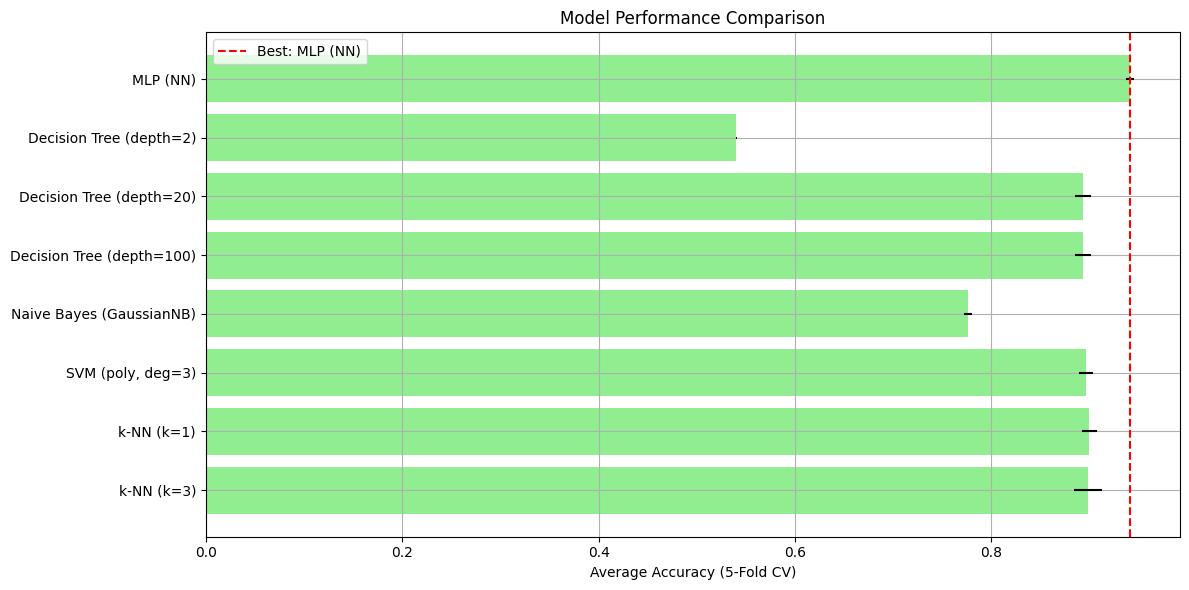


🏆 Best Model: MLP (NN) with Accuracy = 0.9411


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,precision,recall,f1-score,support
WALKING,0.968000,0.945312,0.956522,256.000000
WALKING_UPSTAIRS,0.936709,0.961039,0.948718,231.000000
WALKING_DOWNSTAIRS,0.961165,0.961165,0.961165,206.000000
SITTING,0.888476,0.922780,0.905303,259.000000
STANDING,0.927007,0.894366,0.910394,284.000000
LAYING,1.000000,1.000000,1.000000,279.000000
accuracy,0.946535,0.946535,0.946535,0.946535
macro avg,0.946893,0.947444,0.947017,1515.000000
weighted avg,0.946913,0.946535,0.946567,1515.000000


In [ ]:
activity_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
report = run_classification_pipeline(df_dirty, selected_features, activity_labels)

pd.DataFrame(report).transpose()


#Regression

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

def preprocess_regression_data(df_dirty, selected_features):
    """
    Preprocessing function for training regression-based classification models
    - Remove duplicates
    - Drop missing values
    - Apply StandardScaler for feature scaling
    - One-hot encode activity labels
    - Return final X, y for regression model training

    Parameters:
        df_dirty (pd.DataFrame): Original dirty dataset with noise
        selected_features (List[str]): List of feature column names to use

    Returns:
        X_final (pd.DataFrame): Scaled feature data
        y_onehot (np.ndarray): One-hot encoded activity labels
        df_scaled (pd.DataFrame): DataFrame with scaled features + labels
        label_encoder (LabelEncoder): LabelEncoder used for inverse_transform
        onehot_encoder (OneHotEncoder): OneHotEncoder used for decoding
    """
    #  1. Remove duplicates
    df_cleaned = df_dirty.drop_duplicates()

    #  2. Drop missing values
    df_cleaned = df_cleaned.dropna()

    print(f"[CLEAN] Number of samples after cleaning: {df_cleaned.shape[0]}")
    print(f"[CLEAN] Remaining missing values: {df_cleaned.isnull().sum().sum()}")
    print(f"[CLEAN] Any duplicates remaining?: {df_cleaned.duplicated().any()}")

    #  3. Feature scaling
    df_model = df_cleaned.copy()
    X = df_model[selected_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

    #  4. Label encoding → One-hot encoding
    le = LabelEncoder()
    y_labels = le.fit_transform(df_model["activity"])
    ohe = OneHotEncoder(sparse_output=False)
    y_onehot = ohe.fit_transform(y_labels.reshape(-1, 1))

    print(f"[LABEL] Label classes: {list(le.classes_)}")
    print(f"[LABEL] One-hot encoded shape: {y_onehot.shape}")

    #  5. Final outputs
    df_scaled = pd.concat([df_model[["subject", "activity"]].reset_index(drop=True), X_scaled_df], axis=1)
    X_final = X_scaled_df

    return X_final, y_onehot, df_scaled, le, ohe


[CLEAN] Number of samples after cleaning: 7572
[CLEAN] Remaining missing values: 0
[CLEAN] Any duplicates remaining?: False
[LABEL] Label classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
[LABEL] One-hot encoded shape: (7572, 6)


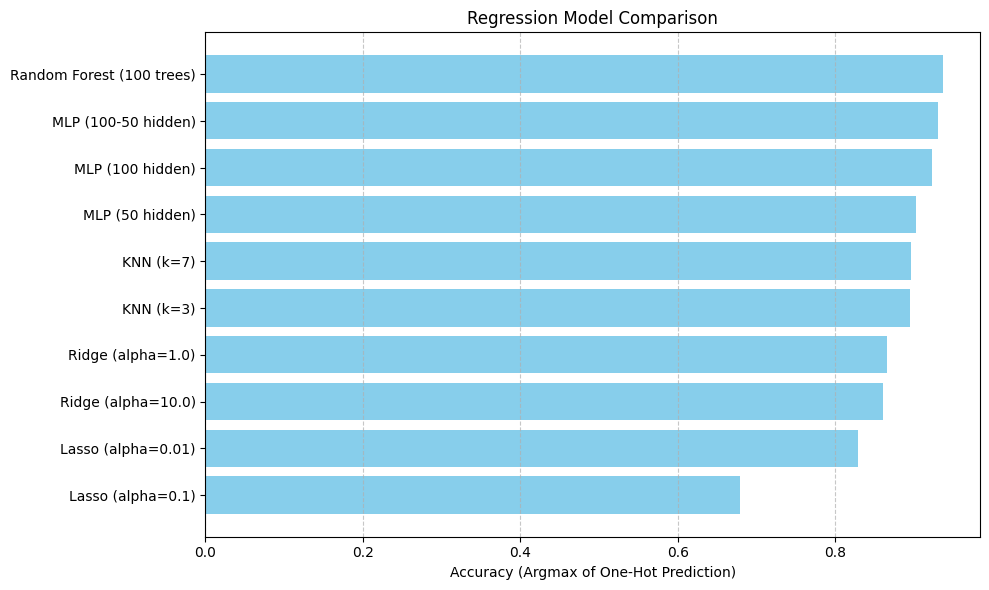


🏆 Best Model: Random Forest (100 trees)

📋 모델별 종합 성능:
                        Model  Accuracy       MSE  Cosine Similarity
6  Random Forest (100 trees)  0.937294  0.015679           0.948914
9        MLP (100-50 hidden)  0.931353  0.019308           0.940482
8           MLP (100 hidden)  0.923432  0.026794           0.917683
7            MLP (50 hidden)  0.902970  0.032661           0.900617
5                  KNN (k=7)  0.896370  0.025976           0.913807
4                  KNN (k=3)  0.895710  0.026696           0.911879
0          Ridge (alpha=1.0)  0.866007  0.052624           0.834205
1         Ridge (alpha=10.0)  0.861386  0.053216           0.831462
2         Lasso (alpha=0.01)  0.829703  0.060455           0.803173
3          Lasso (alpha=0.1)  0.679208  0.092265           0.684456

📋 활동별 예측 성능:
                     precision    recall  f1-score      support
WALKING              0.921488  0.933054  0.927235   239.000000
WALKING_UPSTAIRS     0.899123  0.927602  0.913140   221

In [ ]:
# Updated full regression pipeline using preprocessed X and y_onehot (no preprocessing inside)

def run_regression_evaluation_from_preprocessed(X, y_onehot, activity_labels):
    """
    Run regression evaluation using preprocessed data.
    Includes:
    - Accuracy/MSE/Cosine Similarity per model
    - Visualization for top 5 models
    - Per-activity classification report for best model

    Parameters:
        X (np.ndarray): Scaled feature data
        y_onehot (np.ndarray): One-hot encoded labels
        activity_labels (List[str]): Original class label names

    Returns:
        df_results (pd.DataFrame): Model-level evaluation summary
        df_activity_report (pd.DataFrame): Per-activity classification report (best model)
    """
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, accuracy_score
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

    models = {
        "Ridge (alpha=1.0)": Ridge(alpha=1.0),
        "Ridge (alpha=10.0)": Ridge(alpha=10.0),
        "Lasso (alpha=0.01)": Lasso(alpha=0.01),
        "Lasso (alpha=0.1)": Lasso(alpha=0.1),
        "KNN (k=3)": KNeighborsRegressor(n_neighbors=3),
        "KNN (k=7)": KNeighborsRegressor(n_neighbors=7),
        "Random Forest (100 trees)": RandomForestRegressor(n_estimators=100, random_state=42),
        "MLP (50 hidden)": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42),
        "MLP (100 hidden)": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
        "MLP (100-50 hidden)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    }

    results = []
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_test, axis=1)

        accuracy = accuracy_score(y_true_labels, y_pred_labels)
        mse = mean_squared_error(y_test, y_pred)
        cos_sim = np.mean([
            cosine_similarity(y_test[i].reshape(1, -1), y_pred[i].reshape(1, -1))[0, 0]
            for i in range(len(y_test))
        ])

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "MSE": mse,
            "Cosine Similarity": cos_sim
        })

        predictions[name] = (y_true_labels, y_pred_labels)

    df_results = pd.DataFrame(results).sort_values("Accuracy", ascending=False)

    # Accuracy Bar Plot
    plt.figure(figsize=(10, 6))
    plt.barh(df_results["Model"], df_results["Accuracy"], color="skyblue")
    plt.xlabel("Accuracy (Argmax of One-Hot Prediction)")
    plt.title("Regression Model Comparison")
    plt.grid(True, axis="x", linestyle="--", alpha=0.7)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


    # Best Model: Classification Report
    best_model_name = df_results.iloc[0]["Model"]
    print(f"\n Best Model: {best_model_name}")
    best_true, best_pred = predictions[best_model_name]
    report = classification_report(best_true, best_pred, target_names=activity_labels, output_dict=True)
    df_activity_report = pd.DataFrame(report).transpose()

    return df_results, df_activity_report


activity_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

X_final, y_onehot, df_scaled, le, ohe = preprocess_regression_data(df_dirty, selected_features)
final_report, activity_report = run_regression_evaluation_from_preprocessed(X_final, y_onehot, activity_labels)

print("\n 모델별 종합 성능:\n", final_report)
print("\n 활동별 예측 성능:\n", activity_report)
